In [1]:
import numpy as np
import pandas as pd
import os
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2019-12-31", tz="America/New_York").isoformat()

# Set the ticker information
# UPDATE WITH COMPANY TICKERS
tickers = ["MSFT","KO"]

# Get 3 year's worth of historical price data for Ford, Tesla, GMC
df2019_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df2019_ticker.head()

KO                                      MSFT  \
                            open    high     low   close    volume    open   
time                                                                         
2019-01-02 00:00:00-05:00  46.94  47.215  46.555  46.910   9430243   99.55   
2019-01-03 00:00:00-05:00  46.82  47.370  46.530  46.710   9748578  100.00   
2019-01-04 00:00:00-05:00  46.75  47.570  46.640  47.495   9278915   99.72   
2019-01-07 00:00:00-05:00  47.57  47.750  46.895  46.965  10252953  101.64   
2019-01-08 00:00:00-05:00  47.25  47.570  47.035  47.420  12624845  103.04   

                                                                  
                               high       low    close    volume  
time                                                              
2019-01-02 00:00:00-05:00  101.7500   98.9400  101.010  26692255  
2019-01-03 00:00:00-05:00  100.1850   97.4000   97.500  34611003  
2019-01-04 00:00:00-05:00  102.5100   98.9300  101.775  35976325  
2019-01-07 00:00:00-05:00  103.2681  100.9800  102.150  28570376  
2019-01-08 00:00:00-05:00  103.9700  101.7134  102.730  25193769

In [5]:
# Create and empty DataFrame for closing prices
df2019_closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df2019_closing_prices["KO"] = df2019_ticker["KO"]["close"]
df2019_closing_prices["MSFT"] = df2019_ticker["MSFT"]["close"]

# Drop the time component of the date
df2019_closing_prices.index = df2019_closing_prices.index.date

# Compute daily returns
df2019_daily_returns = df2019_closing_prices.pct_change().dropna()

# Display sample data
df2019_daily_returns.head(10)

,KO,MSFT
2019-01-03,-0.004263,-0.034749
2019-01-04,0.016806,0.043846
2019-01-07,-0.011159,0.003685
2019-01-08,0.009688,0.005678
2019-01-09,-0.017925,0.014796
2019-01-10,0.009663,-0.006523
2019-01-11,0.005636,-0.007338
2019-01-14,-0.003701,-0.006711
2019-01-15,0.009340,0.026048
2019-01-16,-0.013670,0.005822


In [6]:
df2019_daily_returns.describe()

,KO,MSFT
count,251.000000,251.000000
mean,0.000717,0.001849
std,0.010807,0.012496
min,-0.085226,-0.034749
25%,-0.004609,-0.004830
50%,0.000575,0.001568
75%,0.006330,0.009102
max,0.060304,0.043846


<AxesSubplot:ylabel='Frequency'>

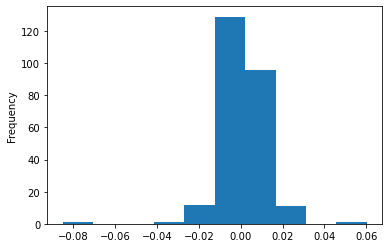

In [7]:
df2019_daily_returns["KO"].plot.hist()

In [8]:
df2019_daily_returns.head()

,KO,MSFT
2019-01-03,-0.004263,-0.034749
2019-01-04,0.016806,0.043846
2019-01-07,-0.011159,0.003685
2019-01-08,0.009688,0.005678
2019-01-09,-0.017925,0.014796


In [9]:
# Annual return

df2019_annual_returns = df2019_closing_prices.pct_change(251).dropna()

In [10]:
df2019_annual_returns.head()

,KO,MSFT
2019-12-31,0.179493,0.559153


In [11]:
from datetime import datetime,date
os.chdir(r"C:\Users\dmwal\Documents\FinTech2021\Project_1\Newly_Minted")
revenue_data = pd.read_excel("draft.xlsx")
#revenue_data.set_index("Date", inplace= True)
#revenue_data.index = pd.to_datetime(revenue_data.index)
revenue_data.head()
#revenue_data[‘revenue_data_pct_change’] = vix.sort_index(ascending=True).pct_change()
#total_returns = pd.merge(total_returns, vix.reset_index(), how=‘inner’, left_on= pd.to_datetime(total_returns[‘time’], utc=True).dt.date,right_on=pd.to_datetime(vix.reset_index()[‘Date’], utc=True).dt.date)
#total_returns.head()

,Ticker,Date,Revenue
0,TSLA,2019-01-01,500
1,TSLA,2020-01-01,600
2,TSLA,2021-01-01,700
3,F,2019-01-01,800
4,F,2020-01-01,300


In [12]:
df2019_annual_returns.head()

,KO,MSFT
2019-12-31,0.179493,0.559153


In [13]:
df2019_annual_returns = pd.DataFrame(df2019_annual_returns.unstack())
df2019_annual_returns.reset_index(inplace = True)
df2019_annual_returns.head()

,level_0,level_1,0
0,KO,2019-12-31,0.179493
1,MSFT,2019-12-31,0.559153


In [24]:
df2019_annual_returns["level_1"] = pd.to_datetime(df2019_annual_returns["level_1"]).dt.year
revenue_data["Date"] = pd.to_datetime(revenue_data["Date"]).dt.year

In [22]:
revenue_data

,Ticker,Date,Revenue
0,TSLA,2019,500
1,TSLA,2020,600
2,TSLA,2021,700
3,F,2019,800
4,F,2020,300
5,F,2021,200


In [25]:
df2019_annual_returns

,level_0,level_1,0
0,KO,2019,0.179493
1,MSFT,2019,0.559153


In [26]:
# Merge the two dataframes on the ticker and date
total_df = pd.merge(df2019_annual_returns, revenue_data, how="outer", left_on= ["level_0", "level_1"],right_on=["Ticker", "Date"])
total_df.head()

,level_0,level_1,0,Ticker,Date,Revenue
0,KO,2019.0,0.179493,NaN,NaN,NaN
1,MSFT,2019.0,0.559153,NaN,NaN,NaN
2,NaN,NaN,NaN,TSLA,1970.0,500.0
3,NaN,NaN,NaN,TSLA,1970.0,600.0
4,NaN,NaN,NaN,TSLA,1970.0,700.0
